In [1]:
import requests
import json

url = 'https://api.spacexdata.com/v4/launches'

#On récupère toutes les informations sur les différents vols de spaceX
r = requests.get(url)
retourJson = json.loads(r.text)
r.status_code


200

# Quel est le taux de réussite de SpaceX pour ses lancements ?

In [2]:
from datetime import datetime

valInter = {
  "reussite":0,
  "echec": 0
}

lstValInter = [];

# on répertorie les réussites et les échecs
for line in retourJson:
        lstValInter.append({"success":line['success'],"dateUnix": line["date_unix"]} )
        if(line['success'] == False):
            valInter["echec"] = valInter["echec"]+1
        if(line['success'] == True):
            valInter["reussite"] = valInter["reussite"]+1                    
            
print(lstValInter)

[{'success': False, 'dateUnix': 1143239400}, {'success': False, 'dateUnix': 1174439400}, {'success': False, 'dateUnix': 1217734440}, {'success': True, 'dateUnix': 1222643700}, {'success': True, 'dateUnix': 1247456100}, {'success': True, 'dateUnix': 1275677100}, {'success': True, 'dateUnix': 1291822980}, {'success': True, 'dateUnix': 1335944640}, {'success': True, 'dateUnix': 1349656500}, {'success': True, 'dateUnix': 1362165000}, {'success': True, 'dateUnix': 1380470400}, {'success': True, 'dateUnix': 1386110460}, {'success': True, 'dateUnix': 1389031560}, {'success': True, 'dateUnix': 1397849100}, {'success': True, 'dateUnix': 1405350900}, {'success': True, 'dateUnix': 1407225600}, {'success': True, 'dateUnix': 1410066000}, {'success': True, 'dateUnix': 1411278720}, {'success': True, 'dateUnix': 1420883220}, {'success': True, 'dateUnix': 1423695780}, {'success': True, 'dateUnix': 1425268200}, {'success': True, 'dateUnix': 1429042200}, {'success': True, 'dateUnix': 1430175780}, {'succe

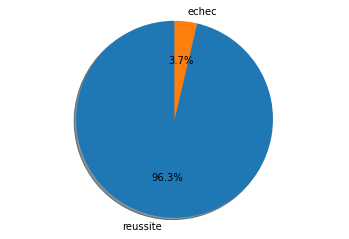

In [3]:
import matplotlib.pyplot as plt

#affichage du camembert échec/réussite de spaceX
name = ['reussite', 'echec']
data = [valInter["reussite"], valInter["echec"]]

explode=(0, 0)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

# Le nombre de vol de Space X at-t-il évolué positivement sur les dernière années ?

{'2006': 1, '2007': 1, '2008': 2, '2009': 1, '2010': 2, '2012': 2, '2013': 3, '2014': 6, '2015': 7, '2016': 9, '2017': 18, '2018': 21, '2019': 13, '2020': 26, '2021': 32, '2022': 4}
['2006', '2007', '2008', '2009', '2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


Text(0, 0.5, 'vol')

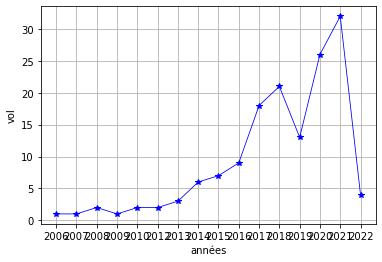

In [4]:
numFlightParYare = {}

#on identifie l'année du vol 
for line in lstValInter:
    anne = datetime.utcfromtimestamp(line['dateUnix']).strftime('%Y')
    if anne in numFlightParYare:
        numFlightParYare[anne] += 1;
    else:
        numFlightParYare[anne] = 1;
        
# affichage du tableau lancement par an    
print(numFlightParYare)

# création et affichage du graphique pour le nombre de vol par année
anne = []
flight = []
for key, value in numFlightParYare.items():
    anne.append( key)
    flight.append( value)
 
print(anne)
plt.grid(True)
plt.plot(anne, flight, "b", linewidth=0.8, marker="*")
plt.xlabel('années')
plt.ylabel('vol')

# Quel masse et quel altitude avec SpaceX ?

In [5]:
# on récupère les infos sur les charges utiles mis en orbite par spaceX
urld = 'https://api.spacexdata.com/v3/payloads'
rd = requests.get(urld)
retourJsonPayload = json.loads(rd.text)
r.status_code

200

In [6]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [7]:
from operator import itemgetter
from tabulate import tabulate

# on récupère toutes les masses et altitudes de chaque vol.
tabPayload = []
for lineP in retourJsonPayload:
    #on vérifie si les infos ne sont pas vides.
    if lineP['payload_mass_kg'] and lineP["orbit_params"]["periapsis_km"] is not None:
        #on récupère les infos et on calcule la moyenne. 
        tabPayload.append({"Payload ID":lineP['payload_id'],"Masse en kg": lineP["payload_mass_kg"], "Altitude en km": lineP["orbit_params"]["periapsis_km"], "Rapport": lineP["orbit_params"]["periapsis_km"]/lineP["payload_mass_kg"]})

tabPayload.sort(key=itemgetter('Payload ID'))

print(tabulate(tabPayload, headers="keys"))

Payload ID                      Masse en kg    Altitude en km       Rapport
----------------------------  -------------  ----------------  ------------
ABS-2A                              1800            35782.9     19.8794
ABS-3A                              1954            35783.4     18.3129
Amos-6                              5500            35785        6.50636
ArabSat 6A                          6000            35765.7      5.96095
AsiaSat 6                           4428            35783.1      8.0811
AsiaSat 8                           4535            35781        7.88996
Bangabandhu-1                       3750            35778.5      9.54095
Beresheet                            585             1261.39     2.15622
BulgariaSat-1                       3669            35776.1      9.75091
CASSIOPE                             500              319.116    0.638232
CCtCap Demo Mission 1              12259              394.367    0.0321696
CCtCap Demo Mission 2               9525     

# D’où peut-on tirer notre fusée avec Space X ?

In [10]:
# on récupère depuis l'API les différents pas de tir qui existent pour spaceX
from operator import itemgetter
from tabulate import tabulate

urlLaunchpads = "https://api.spacexdata.com/v4/launchpads"

response = requests.get(urlLaunchpads)
contenu = json.loads(response.text)

lstLaunchpads = [];

#on récupère les différentes informations sur les pas de tir qui nous interesse
for lines in contenu:
        lstLaunchpads.append({"region":lines['region'], "full_name":lines['full_name'], "longitude":lines['longitude'], "latitude":lines['latitude']} )

lstLaunchpads.sort(key=itemgetter('region'))
print(tabulate(lstLaunchpads, headers="keys"))

region            full_name                                                     longitude    latitude
----------------  ----------------------------------------------------------  -----------  ----------
California        Vandenberg Space Force Base Space Launch Complex 3W           -120.593     34.6441
California        Vandenberg Space Force Base Space Launch Complex 4E           -120.611     34.6321
Florida           Cape Canaveral Space Force Station Space Launch Complex 40     -80.5774    28.5619
Florida           Kennedy Space Center Historic Launch Complex 39A               -80.604     28.6081
Marshall Islands  Kwajalein Atoll Omelek Island                                  167.743      9.04772
Texas             SpaceX South Texas Launch Site                                 -97.1561    25.9973


# Quand peut-on tirer la fusée selon la météo ?

In [11]:
# on fait appel a l'API Dark Sky pour connaitre le temps et les prévisions pour un endroit donnés
url = "https://weatherbit-v1-mashape.p.rapidapi.com/forecast/3hourly"
headers = {
    'x-rapidapi-host': "weatherbit-v1-mashape.p.rapidapi.com",
    'x-rapidapi-key': "9505332663msh5e67c1175daa7fbp1cd6a4jsnb5d78deb1d84"
    }

launchWather = []

# pour chacun des pas de tir on fait appel à lAPI avec la longitude et la latitude
for launchpad in lstLaunchpads:
    querystring = {"lat":launchpad['latitude'],"lon":launchpad['longitude']}
    response = requests.request("GET", url, headers=headers, params=querystring)

    watherVal = []

    jsonWather = json.loads(response.text)
    volGO = False;
    
    # pour chaque ligne d'informations retournée par l'API 
    for value in jsonWather['data']:
        
        # on vérifie si le lancement peut avoir lieu selon les prévisions
        if(value["wind_spd"]< 5 and value["precip"] == 0):
            volGO = True;
            
        # on stock les infos météo pour le lancement selon la date et le lieu
        launchWather.append({"launchpad":launchpad['full_name'],"time":value["datetime"],"wind_spd":value["wind_spd"],"precip":value["precip"],"volGO":volGO})
        volGO = False;

print(launchWather)

[{'launchpad': 'Vandenberg Space Force Base Space Launch Complex 3W', 'time': '2021-10-15:12', 'wind_spd': 2.05817, 'precip': 0, 'volGO': True}, {'launchpad': 'Vandenberg Space Force Base Space Launch Complex 3W', 'time': '2021-10-15:15', 'wind_spd': 1.75379, 'precip': 0, 'volGO': True}, {'launchpad': 'Vandenberg Space Force Base Space Launch Complex 3W', 'time': '2021-10-15:18', 'wind_spd': 1.89885, 'precip': 0, 'volGO': True}, {'launchpad': 'Vandenberg Space Force Base Space Launch Complex 3W', 'time': '2021-10-15:21', 'wind_spd': 1.10828, 'precip': 0, 'volGO': True}, {'launchpad': 'Vandenberg Space Force Base Space Launch Complex 3W', 'time': '2021-10-16:00', 'wind_spd': 1.91398, 'precip': 0, 'volGO': True}, {'launchpad': 'Vandenberg Space Force Base Space Launch Complex 3W', 'time': '2021-10-16:03', 'wind_spd': 1.46527, 'precip': 0, 'volGO': True}, {'launchpad': 'Vandenberg Space Force Base Space Launch Complex 3W', 'time': '2021-10-16:06', 'wind_spd': 1.82984, 'precip': 0, 'volGO'

In [12]:
# pour chacune des infos météo on affiche la ligne le nom du lieu et la date de lancement si le lancement est possible
for watherTime in launchWather:
    if(watherTime['volGO'] == True):
        print('pad : '+ watherTime['launchpad'] + '  date : ' +watherTime['time'])

pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-15:12
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-15:15
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-15:18
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-15:21
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-16:00
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-16:03
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-16:06
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-16:09
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-16:12
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-16:15
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-16:18
pad : Vandenberg Space Force Base Space Launch Complex 3W  date : 2021-10-16:21
pad : Vandenberg Space Force Base Space 